In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# importacion data
data = pd.read_csv('online_sales.csv')
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [29]:
# Busqueda de null
data.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [30]:
# Buscaqueda de duplicados
data.duplicated().sum()

0

### Analisís

In [31]:
Product_name_list = data['Product Name'].unique()
print(Product_name_list)

['iPhone 14 Pro' 'Dyson V11 Vacuum' "Levi's 501 Jeans" 'The Da Vinci Code'
 'Neutrogena Skincare Set' 'Wilson Evolution Basketball'
 'MacBook Pro 16-inch' 'Blueair Classic 480i' 'Nike Air Force 1'
 'Dune by Frank Herbert' 'Chanel No. 5 Perfume'
 'Babolat Pure Drive Tennis Racket' 'Samsung Galaxy Tab S8'
 'Keurig K-Elite Coffee Maker' 'North Face Down Jacket'
 'Salt, Fat, Acid, Heat by Samin Nosrat' 'Dyson Supersonic Hair Dryer'
 'Manduka PRO Yoga Mat' 'Garmin Forerunner 945'
 'Ninja Professional Blender' 'Zara Summer Dress'
 'Gone Girl by Gillian Flynn' 'Olay Regenerist Face Cream'
 'Adidas FIFA World Cup Football' 'Bose QuietComfort 35 Headphones'
 'Panasonic NN-SN966S Microwave' 'Adidas Ultraboost Shoes'
 'Pride and Prejudice by Jane Austen' 'MAC Ruby Woo Lipstick'
 'Nike Air Zoom Pegasus 37' 'Sony WH-1000XM4 Headphones' 'Instant Pot Duo'
 'Under Armour HeatGear T-Shirt' '1984 by George Orwell'
 "L'Oreal Revitalift Serum" 'Peloton Bike' 'Apple Watch Series 8'
 'Roomba i7+' 'Columbia 

In [32]:
prod_count = data['Product Category'].value_counts()
prod_count

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

### ¿ Que categoria tiene mas unidades vendidas ?

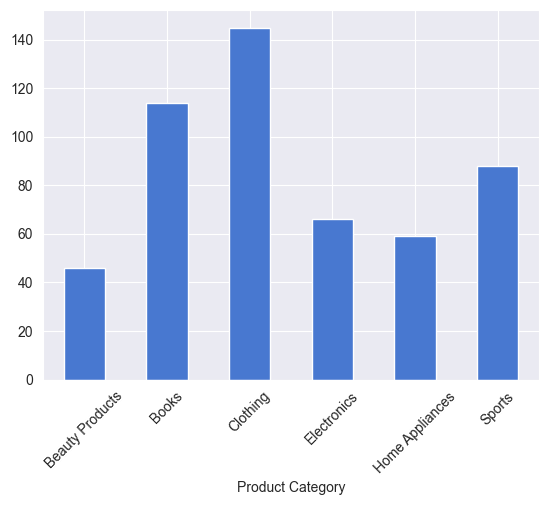

In [57]:
# Cantidad de Productos vendidos por categoria
agr_cat = data.groupby('Product Category')['Units Sold'].sum()
agr_cat.plot(kind='bar',)
plt.grid(True)
plt.xticks(rotation=45)
sns.set_style("dark")
plt.show()

### ¿Que categoria tuvo mas ganancias?

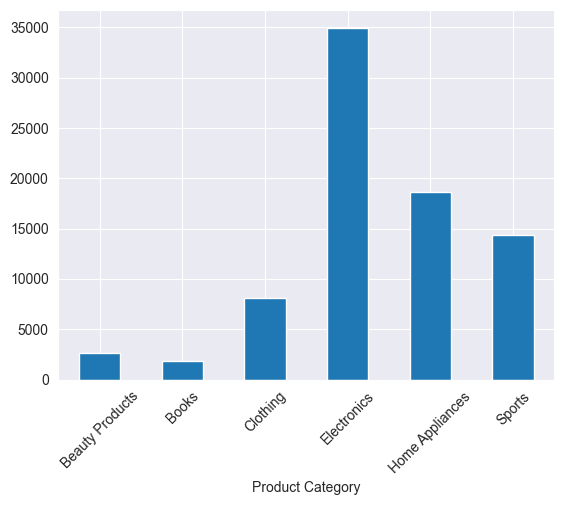

In [44]:
agr_rev = data.groupby('Product Category')['Total Revenue'].sum()
agr_rev.plot(kind='bar')
plt.grid(True)
plt.xticks(rotation=45)
sns.set_style("dark")
plt.show()

### ¿Que Categoria tiene los precios promedios mas altos?

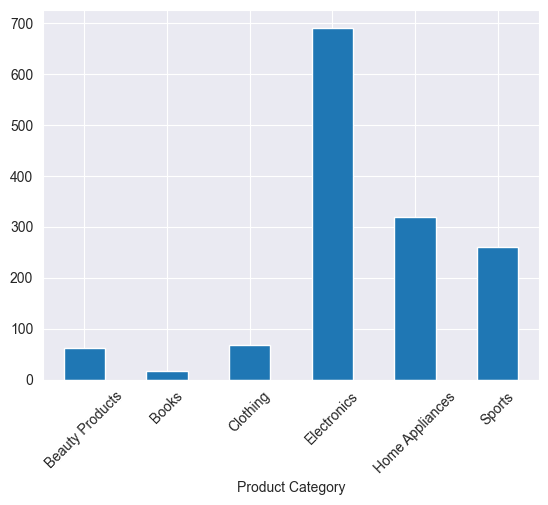

In [45]:
agr_unit = data.groupby('Product Category')['Unit Price'].mean()


agr_unit.plot(kind='bar')
plt.grid(True)
plt.xticks(rotation=45)
sns.set_style("dark")
plt.show()

### ¿Que categoria consume mas cada region ?

In [37]:
data['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

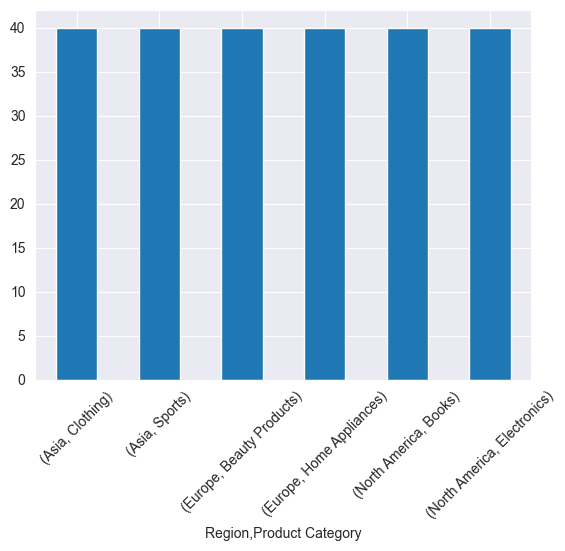

In [47]:
data.groupby('Region')['Product Category'].value_counts().plot(kind='bar')
plt.grid()
sns.set_style("dark")
plt.xticks(rotation=45)
plt.show()

In [39]:
print(data.groupby('Region')['Product Category'].value_counts())

Region         Product Category
Asia           Clothing            40
               Sports              40
Europe         Beauty Products     40
               Home Appliances     40
North America  Books               40
               Electronics         40
Name: count, dtype: int64


#### Respuesta: El dataset esta repartido homogeneamente entre las regiones y categorias.

### Metodo de pago preferido

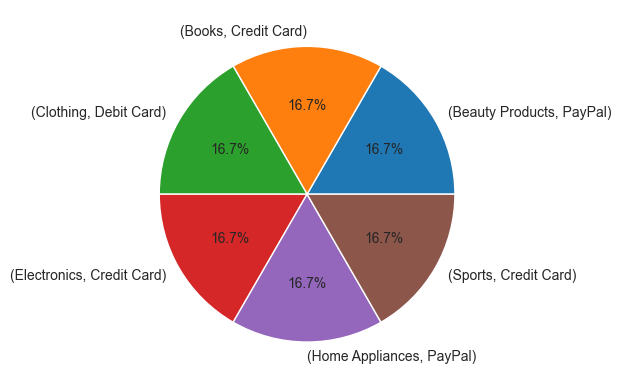

In [49]:
gr_pay = data.groupby('Product Category')['Payment Method'].value_counts()
gr_pay.plot(kind='pie', ylabel='',autopct='%1.1f%%', )
plt.show()

In [41]:
print(gr_pay)

Product Category  Payment Method
Beauty Products   PayPal            40
Books             Credit Card       40
Clothing          Debit Card        40
Electronics       Credit Card       40
Home Appliances   PayPal            40
Sports            Credit Card       40
Name: count, dtype: int64
